In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [4]:
# Format: U/v, I/A, dI/A
data = np.array([
    [0.5, 0.065, 0.01],
    [1.0, 0.206, 0.01],
    [1.5, 0.405, 0.02],
    [2.0, 0.492, 0.02],
    [2.5, 0.606, 0.02],
    [3.0, 0.782, 0.02],
    [3.5, 0.865, 0.02],
    [4.0, 1.018, 0.03],
    [4.5, 1.199, 0.03],
    [5.0, 1.327, 0.03],
    [5.5, 1.408, 0.03],
    [6.0, 1.627, 0.04]
])

Function:   I = a*U
            I = a*U + b

In [5]:
def X_square(data, a,b):
    x = data[:, 0]
    y = data[:, 1]
    sigma = data[:, 2]
    
    frac = ((y - a - b*x)/sigma)**2
    return np.sum(frac)

        
        
def lin_fit_offset(data):
    x = data[:, 0]
    y = data[:, 1]
    sigma = data[:, 2]

    # def S_something
    S = np.sum(1/sigma**2)
    S_x = np.sum(x/sigma**2)
    S_xx = np.sum(x**2/sigma**2)
    S_y = np.sum(y/sigma**2)
    S_xy = np.sum(x*y/sigma**2)

    D = S*S_xx - S_x**2

    a = (S_xx*S_y - S_x*S_xy)/D
    b = (S*S_xy - S_x*S_y)/D

    sigma_a = (S_xx/D)**0.5
    sigma_b = (S/D)**0.5

    chi_sq = X_square(data, a, b)
    chi_sq_norm = chi_sq/(data.shape[0]-2)

    return (a, b, sigma_a, sigma_b, chi_sq, chi_sq_norm)


def lin_fit(data):
    x = data[:, 0]
    y = data[:, 1]
    sigma = data[:, 2]

    # def S_something
    S_xx = np.sum(x*x/sigma**2)
    S_xy = np.sum(x*y/sigma**2)
    S_x = np.sum(x/sigma**2)

    b = S_xy/S_xx   # S. Protokoll

    sigma_b = (S_x/S_xx)**0.5

    chi_sq = X_square(data, 0, b)
    chi_sq_norm = chi_sq/(data.shape[0]-1)

    return (b, sigma_b, chi_sq, chi_sq_norm)


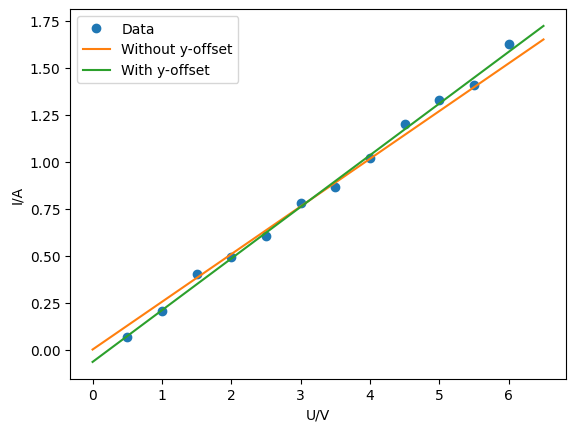

In [6]:
u = np.linspace(0,6.5, 1000)

def lin_func(x, a, b):
    return a + b*x

plt.plot(data[:,0], data[:,1], marker="o", linestyle="None", label="Data")

# Without offset
b, sigma_b, chi_sq, chi_sq_norm = lin_fit(data)
plt.plot(u, lin_func(u,0,b), label="Without y-offset")

# with offset
a_off, b_off, sigma_a_off, sigma_b_off, chi_sq_off, chi_sq_norm_off = lin_fit_offset(data)
plt.plot(u, lin_func(u,a_off, b_off), label="With y-offset")

plt.xlabel("U/V")
plt.ylabel("I/A")
plt.legend()
plt.show()


In [15]:
# a zu R
def b_to_R(b, sigma_b):
    return 1/b, sigma_b/b*2

R_off, sigma_R_off = b_to_R(b_off, sigma_b_off)
R, sigma_R = b_to_R(b, sigma_b)

print("Fit results for I = a + bU:")
print(tabulate([
    ["Without y-offset", "-", "-", b, sigma_b, R, sigma_R, chi_sq],
    ["With y-offset", f"{a_off:.5f}", f"{sigma_a_off:.5f}", b_off, sigma_b_off, R_off, sigma_R_off, chi_sq_off]
], headers=["a/A", "σ_a/A", "b/(A/V)", "σ_b/(A/V)", "R/Ω", "σ_R/Ω", "χ^2"], tablefmt="fancy_grid", numalign="right"))

Fit results for I = a + bU:
╒══════════════════╤══════════╤═════════╤═══════════╤═════════════╤═════════╤═══════════╤═════════╕
│                  │ a/A      │ σ_a/A   │   b/(A/V) │   σ_b/(A/V) │     R/Ω │     σ_R/Ω │     χ^2 │
╞══════════════════╪══════════╪═════════╪═══════════╪═════════════╪═════════╪═══════════╪═════════╡
│ Without y-offset │ -        │ -       │  0.254171 │    0.567194 │ 3.93436 │   4.46309 │   81.96 │
├──────────────────┼──────────┼─────────┼───────────┼─────────────┼─────────┼───────────┼─────────┤
│ With y-offset    │ -0.06604 │ 0.00825 │  0.275416 │  0.00340122 │ 3.63086 │ 0.0246987 │ 17.8831 │
╘══════════════════╧══════════╧═════════╧═══════════╧═════════════╧═════════╧═══════════╧═════════╛
